In [ ]:
import pickle
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import normalize
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Load LSI vectors and speech IDs
with open("pkl_files/nmf_vectors.pkl", "rb") as f:
    nmf_vectors = pickle.load(f)

with open("pkl_files/speech_ids.pkl", "rb") as f:
    speech_ids = pickle.load(f)

with open("pkl_files/lsi_vectors.pkl", "rb") as f:
    lsi_vectors = pickle.load(f)

# Normalize LSI vectors
lsi_vectors_normalized = normalize(lsi_vectors)
nmf_vectors_normalized = normalize(nmf_vectors)


# K-means with NMF

In [ ]:
# Define the range for number of clusters
cluster_range = range(10, 250, 10)  # From 10 to 100 clusters

# Initialize lists to store evaluation metrics
wcss = []
silhouette_scores = []
# Determine optimal number of clusters using Elbow Method and Silhouette Analysis
for k in cluster_range:
        mbk = KMeans(n_clusters=k, random_state=42, n_init='auto')
        mbk.fit(nmf_vectors_normalized)
        wcss.append(mbk.inertia_)
        
        # Compute silhouette score on a sample
        sample_size = 10000
        sil_score = silhouette_score(nmf_vectors_normalized, mbk.labels_, metric='cosine', sample_size=sample_size, random_state=42)
        silhouette_scores.append(sil_score)
        
        print(f"Processed k={k}, WCSS={mbk.inertia_:.2f}, Silhouette Score={sil_score:.4f}")

Processed k=10, WCSS=116621.28, Silhouette Score=0.1201
Processed k=20, WCSS=103490.83, Silhouette Score=0.1683
Processed k=30, WCSS=92760.45, Silhouette Score=0.2118
Processed k=40, WCSS=85252.08, Silhouette Score=0.2316
Processed k=50, WCSS=78081.66, Silhouette Score=0.2574
Processed k=60, WCSS=72337.49, Silhouette Score=0.3016
Processed k=70, WCSS=68783.94, Silhouette Score=0.3075
Processed k=80, WCSS=66392.41, Silhouette Score=0.2980
Processed k=90, WCSS=63976.73, Silhouette Score=0.2928
Processed k=100, WCSS=62466.52, Silhouette Score=0.2862
Processed k=110, WCSS=61052.00, Silhouette Score=0.2807
Processed k=120, WCSS=60179.69, Silhouette Score=0.2603
Processed k=130, WCSS=59743.64, Silhouette Score=0.2431
Processed k=140, WCSS=59201.19, Silhouette Score=0.2308
Processed k=150, WCSS=58412.82, Silhouette Score=0.2107
Processed k=160, WCSS=57868.10, Silhouette Score=0.2016
Processed k=170, WCSS=57320.92, Silhouette Score=0.1997
Processed k=180, WCSS=56956.84, Silhouette Score=0.1939

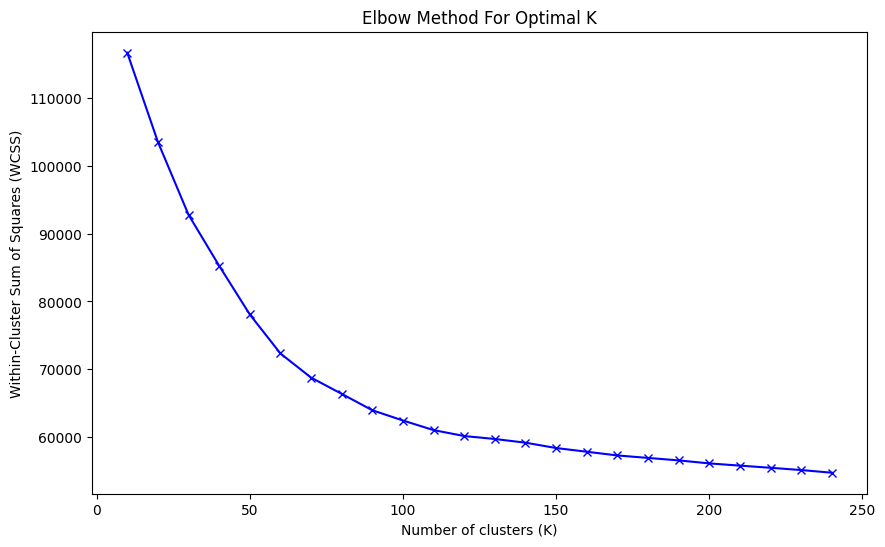

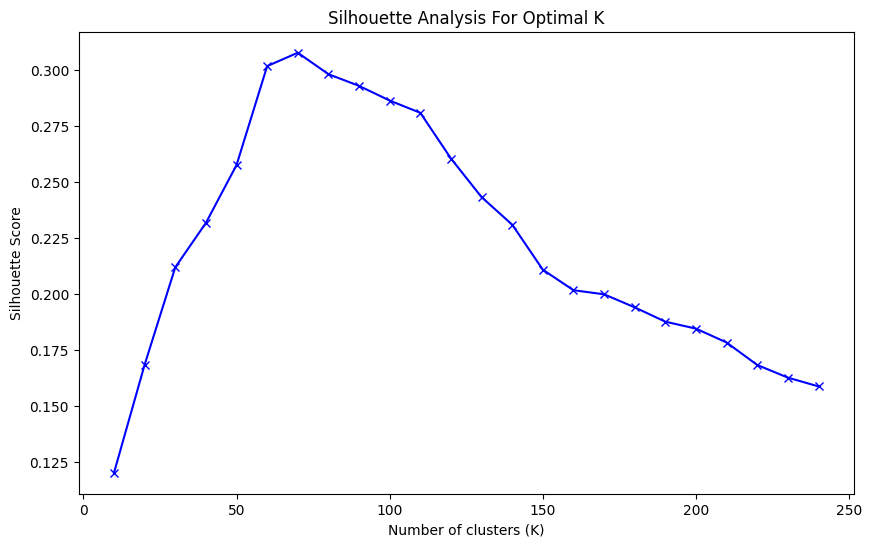

In [14]:
# Plot Elbow Method
plt.figure(figsize=(10,6))
plt.plot(cluster_range, wcss, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method For Optimal K')
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10,6))
plt.plot(cluster_range, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal K')
plt.show()

# K-means with LSI

In [15]:
# Define the range for number of clusters
cluster_range = range(10, 250, 10)  # From 10 to 100 clusters

# Initialize lists to store evaluation metrics
wcss = []
silhouette_scores = []
# Determine optimal number of clusters using Elbow Method and Silhouette Analysis
for k in cluster_range:
        mbk = KMeans(n_clusters=k, random_state=42, n_init='auto')
        mbk.fit(lsi_vectors_normalized)
        wcss.append(mbk.inertia_)
        
        # Compute silhouette score on a sample
        sample_size = 10000
        sil_score = silhouette_score(lsi_vectors_normalized, mbk.labels_, metric='cosine', sample_size=sample_size, random_state=42)
        silhouette_scores.append(sil_score)
        
        print(f"Processed k={k}, WCSS={mbk.inertia_:.2f}, Silhouette Score={sil_score:.4f}")

Processed k=10, WCSS=116621.28, Silhouette Score=0.1201
Processed k=20, WCSS=103490.83, Silhouette Score=0.1683
Processed k=30, WCSS=92760.45, Silhouette Score=0.2118
Processed k=40, WCSS=85252.08, Silhouette Score=0.2316
Processed k=50, WCSS=78081.66, Silhouette Score=0.2574
Processed k=60, WCSS=72337.49, Silhouette Score=0.3016
Processed k=70, WCSS=68783.94, Silhouette Score=0.3075
Processed k=80, WCSS=66392.41, Silhouette Score=0.2980
Processed k=90, WCSS=63976.73, Silhouette Score=0.2928
Processed k=100, WCSS=62466.52, Silhouette Score=0.2862
Processed k=110, WCSS=61052.00, Silhouette Score=0.2807
Processed k=120, WCSS=60179.69, Silhouette Score=0.2603
Processed k=130, WCSS=59743.64, Silhouette Score=0.2431
Processed k=140, WCSS=59201.19, Silhouette Score=0.2308
Processed k=150, WCSS=58412.82, Silhouette Score=0.2107
Processed k=160, WCSS=57868.10, Silhouette Score=0.2016
Processed k=170, WCSS=57320.92, Silhouette Score=0.1997
Processed k=180, WCSS=56956.84, Silhouette Score=0.1939

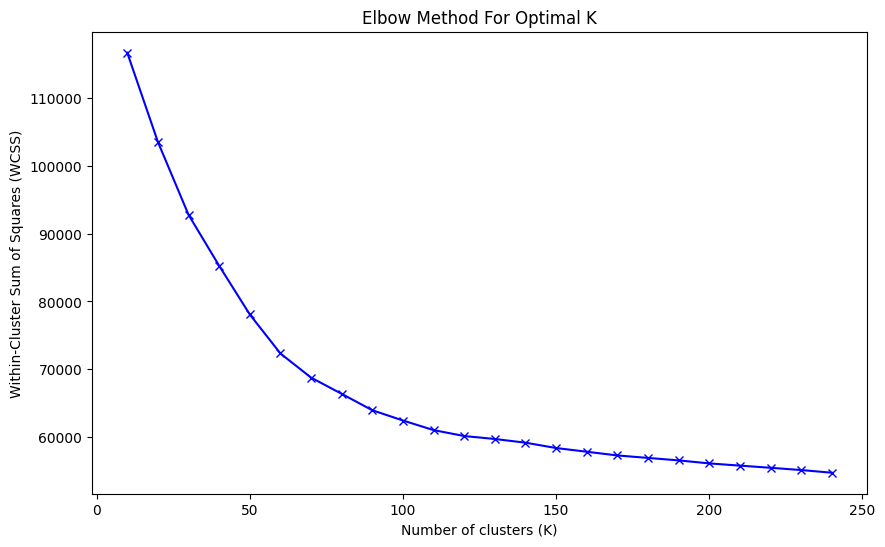

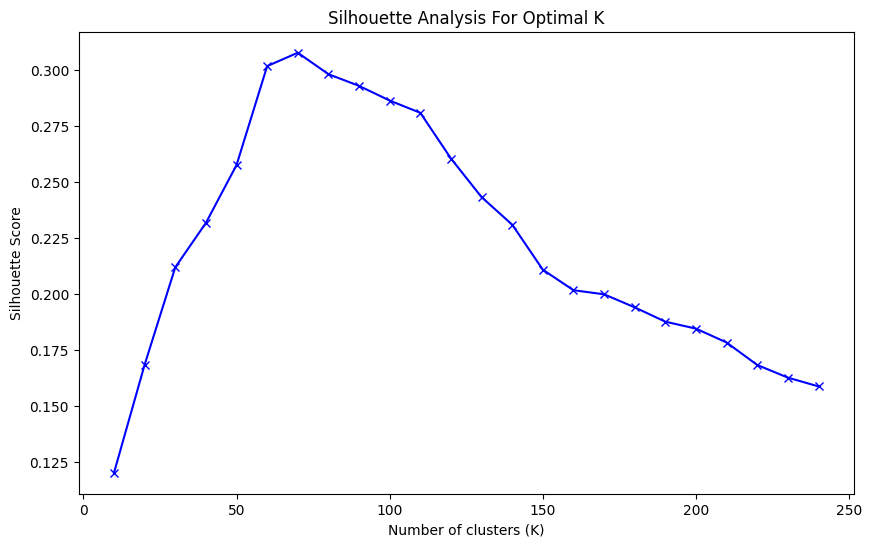

In [16]:
# Plot Elbow Method
plt.figure(figsize=(10,6))
plt.plot(cluster_range, wcss, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method For Optimal K')
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10,6))
plt.plot(cluster_range, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal K')
plt.show()